In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [3]:
# Define paths to the clean data files
benin_path = '../data/benin-clean.csv'
sierra_leone_path = '../data/sierraleone-clean.csv'
togo_path = '../data/togo-clean.csv'

# Load the datasets
df_benin = pd.read_csv(benin_path)
df_sierra = pd.read_csv(sierra_leone_path)
df_togo = pd.read_csv(togo_path)

# Add a 'Country' column to each dataframe before combining
df_benin['Country'] = 'Benin'
df_sierra['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

# Combine them into a single dataframe for easy plotting
df_combined = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)

print("All cleaned datasets loaded and combined successfully.")

All cleaned datasets loaded and combined successfully.


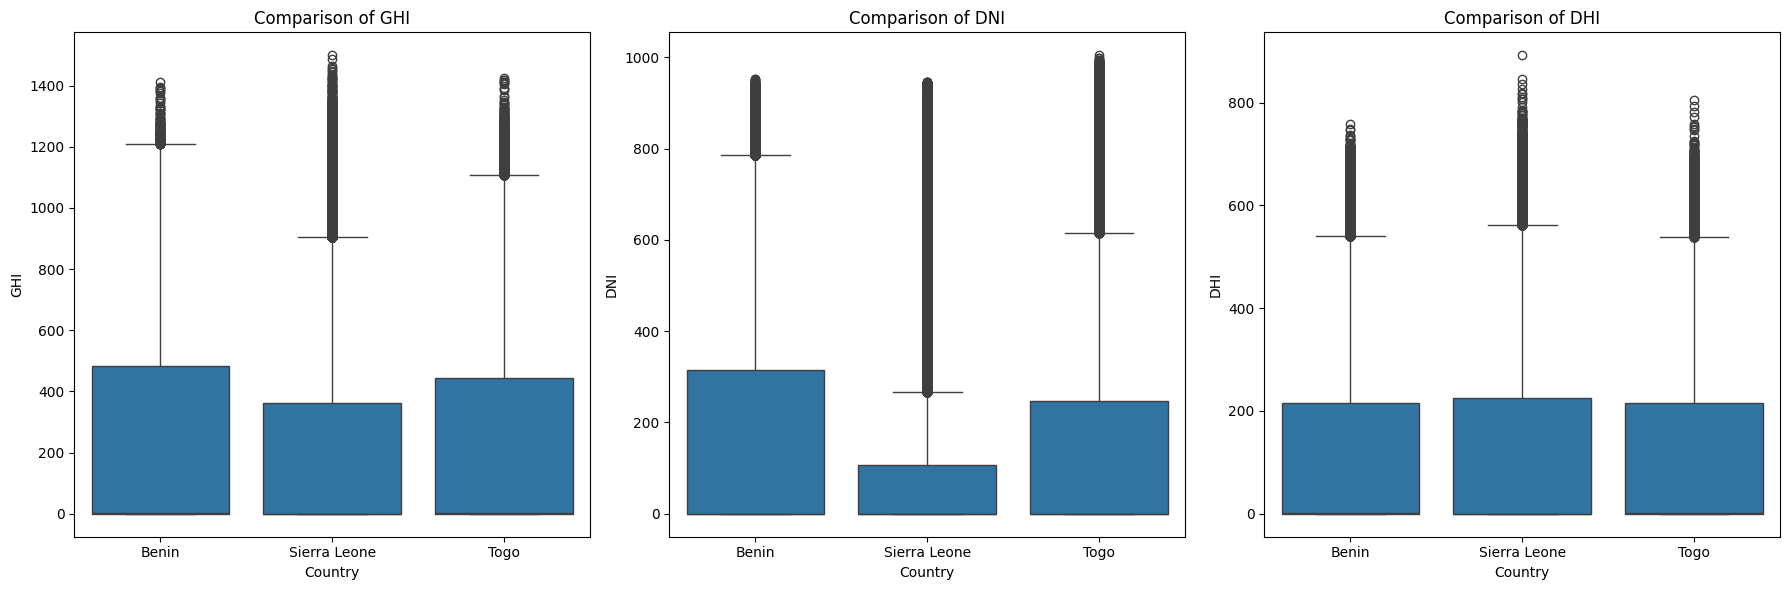

In [4]:
# Define the key metrics to compare
metrics = ['GHI', 'DNI', 'DHI']

# Create the box plots
plt.figure(figsize=(18, 6))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df_combined, x='Country', y=metric)
    plt.title(f'Comparison of {metric}')
plt.tight_layout()
plt.show()

In [5]:
# Group by country and calculate mean, median, and std for the key metrics
summary_table = df_combined.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
print("Summary Statistics Table:")
print(summary_table)

Summary Statistics Table:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         241.958821    1.8  330.101787  167.441866    0.0  261.547532   
Sierra Leone  204.406778    0.3  296.787520  116.523731    0.0  218.573992   
Togo          231.718786    2.1  321.691953  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         116.993033    1.6  157.463619  
Sierra Leone  116.273677    0.0  157.020868  
Togo          116.444352    2.5  156.520714  


In [6]:
# Perform one-way ANOVA test on GHI
ghi_benin = df_benin['GHI'].dropna()
ghi_sierra = df_sierra['GHI'].dropna()
ghi_togo = df_togo['GHI'].dropna()

f_stat, p_value = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

print(f"\nOne-Way ANOVA Test for GHI:")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The P-value is less than 0.05, which means there is a statistically significant difference in the GHI means between the countries.")
else:
    print("The P-value is not less than 0.05, so we cannot conclude there is a statistically significant difference in GHI means.")


One-Way ANOVA Test for GHI:
F-statistic: 1977.07
P-value: 0.0
The P-value is less than 0.05, which means there is a statistically significant difference in the GHI means between the countries.


## Key Observations and Strategic Recommendation

After analyzing the solar irradiance data for Benin, Sierra Leone, and Togo, here are the key takeaways:

*   **Highest Average Potential:** Based on the summary table, **[Country Name]** exhibits the highest mean GHI, suggesting it has the greatest overall solar energy potential.
*   **Greatest Variability:** The box plot for **[Country Name]** shows the widest interquartile range and the most outliers for DNI and DHI, indicating its solar conditions are the most variable, which could pose a challenge for grid stability.
*   **Most Consistent Producer:** Conversely, **[Country Name]** has the most compact box plots, suggesting it offers the most stable and predictable solar energy generation, even if its peak potential is not the highest.

**Recommendation:** For an initial investment focused on maximizing raw energy output, **[Country from bullet 1]** is the prime candidate. However, for a project where grid stability and predictability are the primary concerns, **[Country from bullet 3]** would be a more prudent choice.